# Facteurs influençant le succès des projets de kickstarter 

Importation des dépendances

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# La commande inclura des graphiques dans le jupyter-notebook
%matplotlib inline

In [3]:
df = pd.read_csv('dataset.csv') # Lecture csv

## Premier balayage

In [4]:
df.head() # afficher les 5 premieres lignes

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
df.tail() # afficher les 5 derniere lignes

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


In [6]:
df.info() # affiche le nom des colonnes et leur type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 31.8+ MB


In [7]:
df.describe() # description des valeurs du dataframe avec minimum maximum q1 q2 q3 moyenne...

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


Nous remarquons qu'il y a une différence significative dans certaines colonnes entre la valeur minimale et la valeur maximale.

## Etude des valeurs manquantes et dupliquées

In [8]:
print(df.isna().sum())
df[df['name'].isnull() == True]

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


Nous remarquons que sur 378660 lignes nous avons 3797 lignes (elles représentent 1% du nombre total de lignes) où il manque l'information usd pledged. puisque cette information est un flottant nous pouvons la remplacer par la moyenne supprimer ou ignorer.

Pour les projets qui n'ont pas de noms on remarque que aucun n'a réussi.

In [9]:
df.duplicated().sum()

0

Ce csv n'a aucune duplication entre chaque row

In [10]:
len(df[df.duplicated(subset=['usd_pledged_real','usd pledged'], keep=False) == True])/len(df)*100

65.5449069220226

On remarque que entre usd_pledged_real et usd pledged la colonne est dupliqué à 65.5%

In [11]:
len(df[df.duplicated(subset=['usd_goal_real','goal'], keep=False) == True])/len(df)*100

90.90056805427545

On remarque que entre usd_goal_real et goal la colonne est dupliqué à 90.9%

je me concentrerai davantage sur les "real" des colonnes pur le reste de l'etude

## Analyse des outliers

In [12]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


### Nous remarquons qu'il y a des projets où certaines valeurs de colonnes dépassent de loin la majorité des autres valeurs
### exemple :
##### cas goal : 
la valeur minimum est de 0.01 sinon entre 25% et 75% des cas on est entre 2000-4076 et la valeur max 100Millions
##### cas backers
entre 0% et 75% des cas on est entre 0-56 et la valeur max 219382 


Text(0.5, 1.0, 'Analyse des outliers')

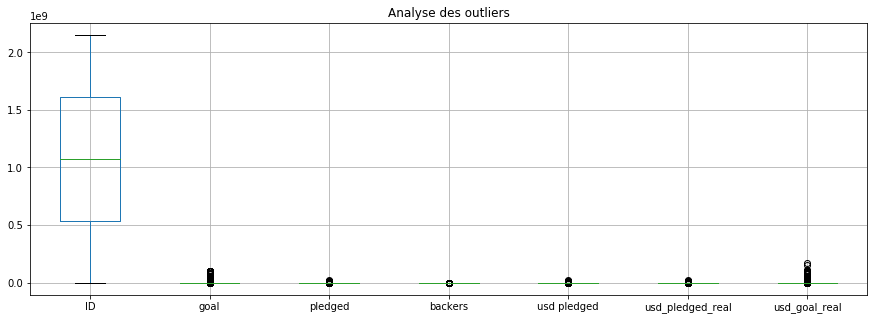

In [13]:
df.boxplot(figsize=(15,5))
plt.title("Analyse des outliers")

## Analyse univariée

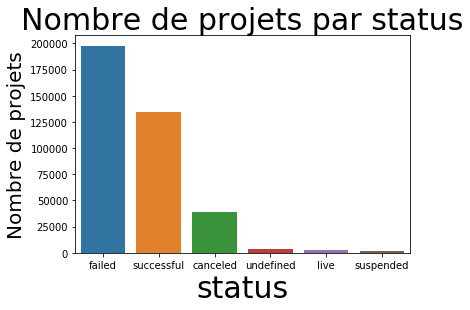

35.38% des projets ont été un succès
52.22% des projets ont échoué
10.24% des projets ont été annulé
2.17% autre etat de projets à faible pourcentage
64.62% qui n ont pas réussi


In [14]:
state = sns.countplot('state', data=df, order=df['state'].value_counts().index)
state.axes.set_title('Nombre de projets par status',fontsize=30)
state.set_xlabel("status",fontsize=30)
state.set_ylabel("Nombre de projets",fontsize=20)
plt.show()
reussite = len(df[df['state'] == 'successful']) / len(df) * 100
echec = len(df[df['state'] == 'failed']) / len(df) * 100
annuler = len(df[df['state'] == 'canceled']) / len(df) * 100
autre = 100 - (reussite + echec + annuler)
not_success = 100 - reussite
print('{}% des projets ont été un succès\n\
{}% des projets ont échoué\n\
{}% des projets ont été annulé\n\
{}% autre etat de projets à faible pourcentage\n\
{}% qui n ont pas réussi'.format(round(reussite, 2), 
                                                     round(echec, 2), 
                                                     round(annuler, 2), 
                                                     round(autre, 2),
                                                     round(not_success, 2))
     )

In [15]:
df.main_category.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

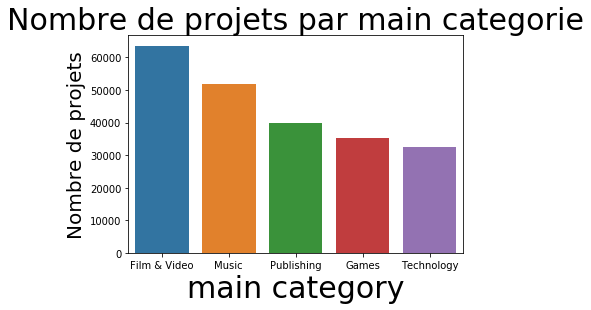

In [16]:
bar_main_category_head = sns.countplot('main_category', data=df, order=df['main_category'].value_counts().iloc[:5].index)
bar_main_category_head.axes.set_title('Nombre de projets par main categorie',fontsize=30)
bar_main_category_head.set_xlabel("main category",fontsize=30)
bar_main_category_head.set_ylabel("Nombre de projets",fontsize=20)
plt.show()

On constate que par ordre décroissant la difference entre chaque Xi et Xi-1 la difference n'est pas tres grande

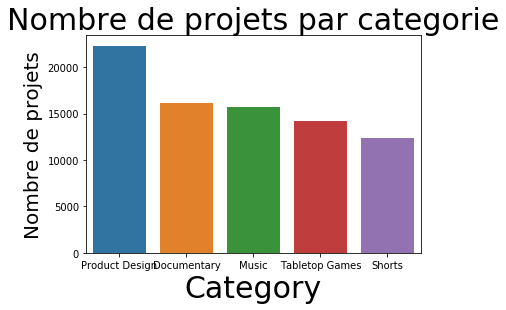

In [17]:
bar_main_category = sns.countplot('category', data=df, order=df['category'].value_counts().iloc[:5].index)
bar_main_category.axes.set_title('Nombre de projets par categorie',fontsize=30)
bar_main_category.set_xlabel("Category",fontsize=30)
bar_main_category.set_ylabel("Nombre de projets",fontsize=20)
plt.show()

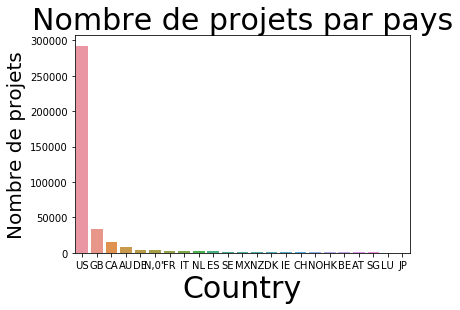

In [18]:
bar_country = sns.countplot('country', data=df, order=df['country'].value_counts().index)
bar_country.axes.set_title('Nombre de projets par pays',fontsize=30)
bar_country.set_xlabel("Country",fontsize=30)
bar_country.set_ylabel("Nombre de projets",fontsize=20)
plt.show()

On constate qu'une grande majorité des projets sont d'origine des USA suivi par la grande bretagne

#### Creation d'une colonne par année de lancement de projet

In [19]:
# année de lancement
df['launched_year']=pd.to_datetime(df['launched'], format="%Y/%m/%d").dt.year

In [20]:
df.head() # on affiche la DF avec la nouvelle column

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,2017
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2013
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,2012
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015


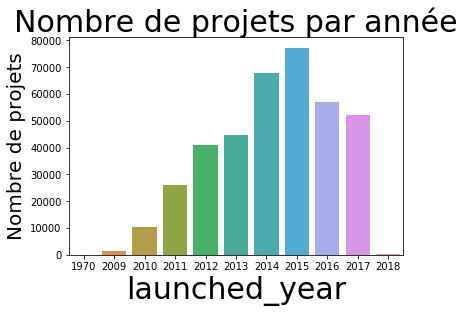

In [21]:
bar_launched_year = sns.countplot('launched_year', data=df)
bar_launched_year.axes.set_title('Nombre de projets par année',fontsize=30)
bar_launched_year.set_xlabel("launched_year",fontsize=30)
bar_launched_year.set_ylabel("Nombre de projets",fontsize=20)
plt.show()

On observe une distribution gaussienne au fil des années, dont l'extremum maximale est l'année 2015

In [22]:
# conversion des string en date puis soustraction pour créer la nouvelle colonne
df['deadline']=pd.to_datetime(df['deadline'], format="%Y/%m/%d").dt.date
df['launched']=pd.to_datetime(df['launched'], format="%Y/%m/%d").dt.date
df['duration_days'] = (df['deadline'] - df['launched']).dt.days

In [23]:
df.head() # affichage de la nouvelle colunne

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,duration_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,0,GB,0.0,0.0,1533.95,2015,59
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.0,failed,15,US,100.0,2421.0,30000.00,2017,60
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3,US,220.0,220.0,45000.00,2013,45
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,1,US,1.0,1.0,5000.00,2012,30
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015,56


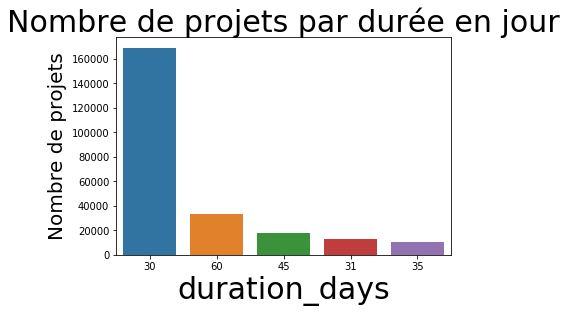

In [24]:
bar_launched_year = sns.countplot('duration_days', data=df, order=df['duration_days'].value_counts().iloc[:5].index)
bar_launched_year.axes.set_title('Nombre de projets par durée en jour',fontsize=30)
bar_launched_year.set_xlabel("duration_days",fontsize=30)
bar_launched_year.set_ylabel("Nombre de projets",fontsize=20)
plt.show()

On remarque que la majorité des projets dure 30jours

## Analyse multivariée

In [25]:
failed = df.loc[df.state=='failed']
successful = df.loc[df.state=='successful']
canceled = df.loc[df.state=='canceled']
print('On remarque que : ')
print('Durée moyenne des projets qui ont échoué',round(successful['duration_days'].mean(),), 'jours')
print('Durée moyenne des projets qui ont échoué',round(failed['duration_days'].mean(), 1), 'jours')
print('Durée moyenne des projets qui ont été annulé',round(canceled['duration_days'].mean(), 1), 'jours')

On remarque que : 
Durée moyenne des projets qui ont échoué 32.0 jours
Durée moyenne des projets qui ont échoué 35.2 jours
Durée moyenne des projets qui ont été annulé 38.3 jours


In [26]:
state_sucess_fail = df['state'].copy()
# on remplace toute celle qui ne sont pas successful par not successful
state_sucess_fail.replace('canceled', False, inplace=True)
state_sucess_fail.replace('live', False, inplace=True)
state_sucess_fail.replace('failed', False, inplace=True)
state_sucess_fail.replace('undefined', False, inplace=True)
state_sucess_fail.replace('suspended', False, inplace=True)
state_sucess_fail.replace('successful', True, inplace=True)

df['is_success'] = state_sucess_fail


In [27]:
df['fusion_engaged_goal_read'] = df['usd_pledged_real'] - df['usd_goal_real'] # on crée une nouvelle colonne

In [28]:
df.head() # Affichage avec les deux nouvelles colonne is success et fusion_engaged_goal_read

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,duration_days,is_success,fusion_engaged_goal_read
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,0,GB,0.0,0.0,1533.95,2015,59,False,-1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.0,failed,15,US,100.0,2421.0,30000.00,2017,60,False,-27579.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3,US,220.0,220.0,45000.00,2013,45,False,-44780.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,1,US,1.0,1.0,5000.00,2012,30,False,-4999.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015,56,False,-18217.00


In [29]:
negativ_goal = df[df['fusion_engaged_goal_read'] < 0]
print(len(negativ_goal[negativ_goal['is_success'] == True]), 'projets' )
print(len(negativ_goal[negativ_goal['is_success'] == True])/len(df)*100)

5 projets
0.0013204422953512508


on constate que seulement 5 projets ont réussi sans atteindre le montant fixé. cela représente 0,0013 % du pourcentage total.

In [30]:
positif_goal = df[df['fusion_engaged_goal_read'] >= 0]
print(len(positif_goal[positif_goal['is_success'] == False]), 'projets' )
print(len(positif_goal[positif_goal['is_success'] == False])/len(df)*100)

3091 projets
0.8162974269861434


on constate que 2952 projets n'ont pas réussi à atteindre le montant fixé, ce qui représente 0.82% du pourcentage total.

Plus de chiffre : 

Chance de reussir si engaged est inferieur au goal est de : 0.0013% contre 99.9987% de ne pas réussir

Chance de réussir si engaged est supérieur ou égale est de 99,18% contre 0.81% de ne pas réussir

Text(0.5, 1.0, 'Nombre de projets par main category separer par le facteur is_success')

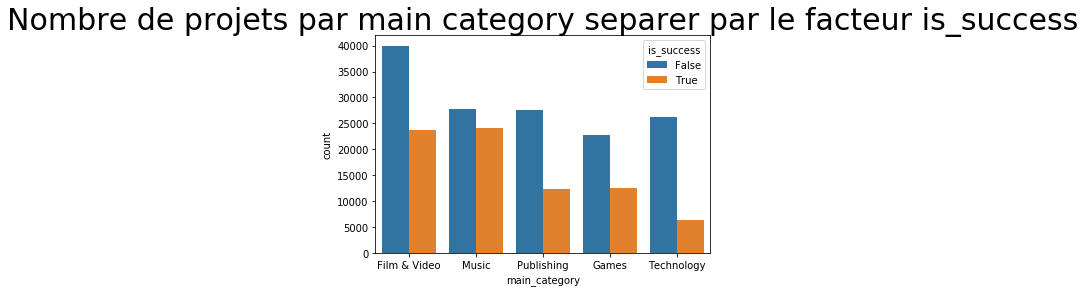

In [31]:
bar_is_succes_main_category = sns.countplot(x='main_category', data=df, hue='is_success', order=df['main_category'].value_counts().iloc[:5].index)
bar_is_succes_main_category.axes.set_title('Nombre de projets par main category separer par le facteur is_success',fontsize=30)

Nombre de projet des main category par rapport a la réussite, True = success et Flase = not success, on constate par exemple que en technology il y a un tres faible taux de réussite

<Figure size 1080x1080 with 0 Axes>

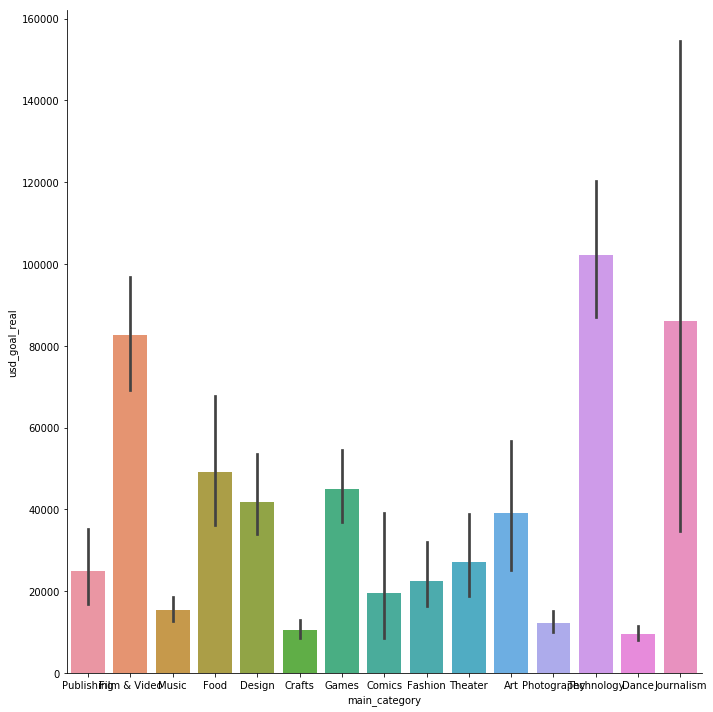

In [36]:
# main category des projets par rapport à l'argent fixé comme objectif
plt.figure(figsize=(15,15))
fact_goal_main_categ = sns.factorplot(x="main_category", y="usd_goal_real", data=df, kind="bar", size = 10)

Il semble que les projets qui demande le plus d'argent sont les catégories Journalisme, Technologie et Film & Vidéo

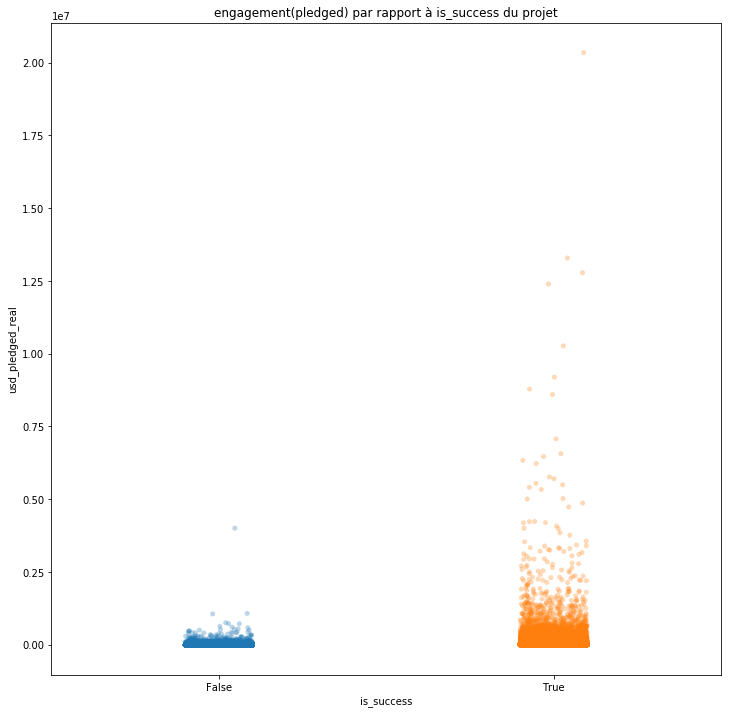

In [33]:
plt.figure(figsize=(12,12))
plot = sns.stripplot('is_success',
          'usd_pledged_real',
          data=df, jitter = .1, alpha= .3)
plt.title ('engagement(pledged) par rapport à is_success du projet')
plt.show()

On constate que les projets qui ont réussi (True) ont beaucoup plus de pledged (d'argent investi dans le projet) 

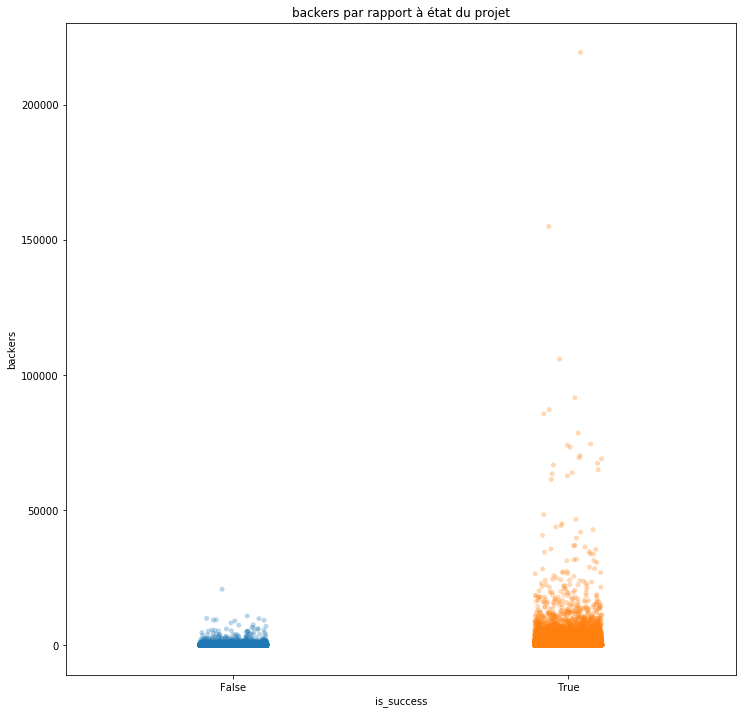

In [34]:
plt.figure(figsize=(12,12))
plot = sns.stripplot('is_success',
          'backers',
          data=df, jitter = .1, alpha= .3)
plt.title ('backers par rapport à état du projet')
plt.show()

Pour les backers, le soutiens des partisans semble avoir un impact positif sur la réussite des projets

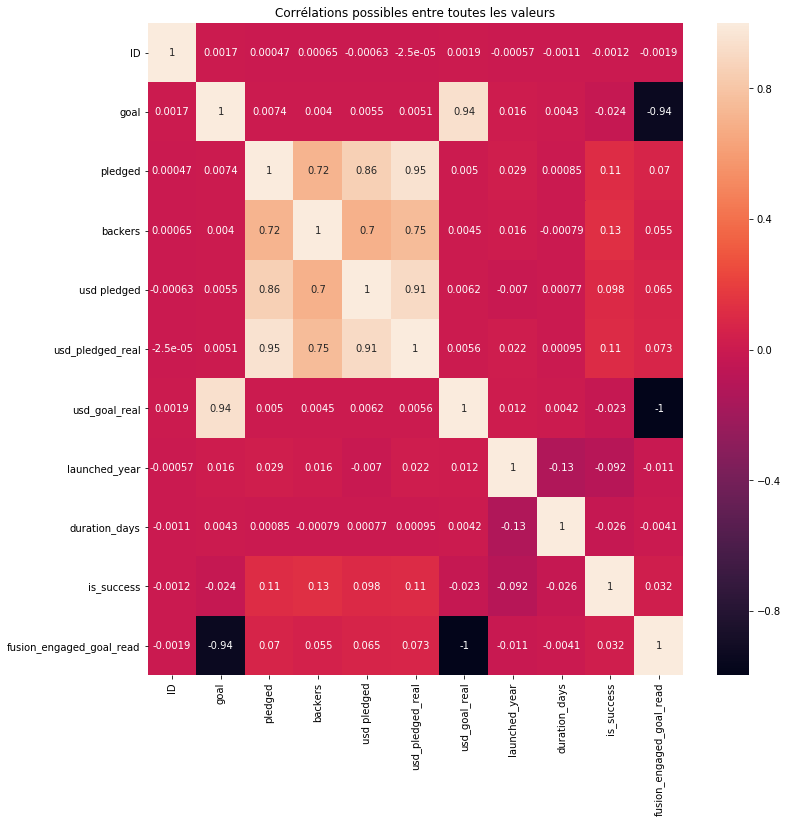

In [35]:
dimensions = (12, 12)
fig, ax = plt.subplots(figsize=dimensions)
plt.title("Corrélations possibles entre toutes les valeurs")
sns.heatmap(ax=ax, data=df.corr(), annot=True)

Nous remarquons que les backers ont une forte correlation avec pledged, les partisans semblent augmenter en meme temps que le montant d'engagement augmente. D'autre part, backers semble avoir une faible relation avec goal.

les pledged ont une forte correlation avec real pledged, car il y a beaucoup de duplication entre les deux colonnes. Pareil pour goal et real goal.